# Hello World !

## This Notebook By : Mahmoud Ahmed Shawqi
## Intake (44 AI), ITI, Smart Village Branch
## **Numerical Optimization** Course

- This Notebook contains the practical implementation to most commonly used optimizers in Machine learning and Deep learning.

- All implemented with Mean Square Error (MSE) Loss Function.

- **(Vanilla Batch Gradient Descent - Stochastic GD - MiniBatch GD - Momentum Based GD - Nestrov Accelerated GD - Adaptive GD - RMSProp - Adaptive Momentum GD ADAM)**

In this practical exam you are required to do the following:

Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
Update your implementation to work for mini-batch.
Please fulfil the following requirements:
1. Each implementation must be in a sepearate function. i.e. two separate functions.
2. Check each function on the data in the attached file.
3. You must obtain r2-score > 0.9 using each functiion.
4. You must plot the following curves.
    - Loss vs. iterations.
    - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
5. Choose hyper parameters to obtain the required accuracy.
6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.

In [752]:
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [881]:
X = np.linspace(0,20).reshape((-1,1))
a=-2
b=1
y=a*X+b
noise = np.random.normal(size=X.shape[0], loc=0, scale=3).reshape((-1, 1))
y += noise

In [873]:
X.shape

(50, 1)

In [874]:
y.shape

(50, 1)

In [968]:
def plot_loss(loss,learning_rate):
    plt.plot(loss, marker='o', linewidth=0.8, alpha=0.3)
    plt.grid(True)
    plt.title(f'Loss vs Iteration, Learning Rate = {learning_rate}')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

def plot_loss_theta(all_thetas, loss, learning_rate):
    for i in range(all_thetas.shape[1]):
        plt.figure(i)
        plt.plot(all_thetas[::, i, ::], loss, marker='o', color=np.random.rand(3,), label=f'Learning Rate = {learning_rate}', alpha=0.3)
        plt.xlabel(f'Theta {i}')
        plt.ylabel('Loss')
        plt.title(f'Loss vs Theta {i}, Learning Rate = {learning_rate}')
        plt.grid(True)
        plt.show()
    
def plot_Reg_Lines(all_thetas, learning_rate):
    plt.figure(1)
    plt.scatter(x=X, y=y)
    for i in range(all_thetas.shape[0]):
        plt.plot(X, (all_thetas[i, 0, ::] + X * all_thetas[i, 1, ::]), color='red', label=f'Learning Rate = {learning_rate}', alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Regression lines for Epochs, Learning Rate = {learning_rate}')
    plt.grid(True)
    plt.show()
    
def plot_Best_Reg_Line(y_pred, learning_rate):
    plt.figure(1)
    plt.scatter(x=X, y=y)
    plt.plot(X, y_pred, color='red', label=f'Learning Rate = {learning_rate}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Best Regression line, Learning Rate = {learning_rate}')
    plt.grid(True)
    plt.show()
    
def all_plots(loss, all_thetas, y_pred, lr):
    plot_loss(loss,lr)
    plot_loss_theta(all_thetas, loss, lr)
    plot_Reg_Lines(all_thetas, lr)
    plot_Best_Reg_Line(y_pred, lr)

## [1] Batch GD :

### **Controller is max number of iterations**

In [969]:
# Controller is max number of 
from tqdm import tqdm

def GD(data, labels, learning_rate=0.001, epochs=100, verbose=False):
    loss = []
    all_thetas = []
    y_preds = []
    data_with_itercept = np.column_stack((np.ones_like(labels), data))
    theta = np.random.normal(size=data_with_itercept.shape[1], loc=0, scale=5).reshape((data_with_itercept.shape[1], 1))
    
    print(f"Initial theta =\n{theta}")
        
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        h = data_with_itercept @ theta
        y_preds.append(h)
        Err_vec = h - labels
        J = np.linalg.norm(Err_vec, ord=2)**2 / (2 * len(labels))
        loss.append(J)
        grad = (1 / len(labels)) * (data_with_itercept.T @ Err_vec)
        theta = theta - learning_rate * grad
        all_thetas.append(theta)
        
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")

    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    all_thetas = np.array(all_thetas)
    loss = np.array(loss)
    y_pred = data_with_itercept @ theta
    
    if verbose:
        print(f"y predict = {y_pred}")

    return all_thetas, loss, y_preds, theta, y_pred


Initial theta =
[[ 0.7072441 ]
 [-4.14735761]]

Final Parameters:
theta :
[[ 0.86992297]
 [-1.96660437]]
final cost : 4.076389603395336


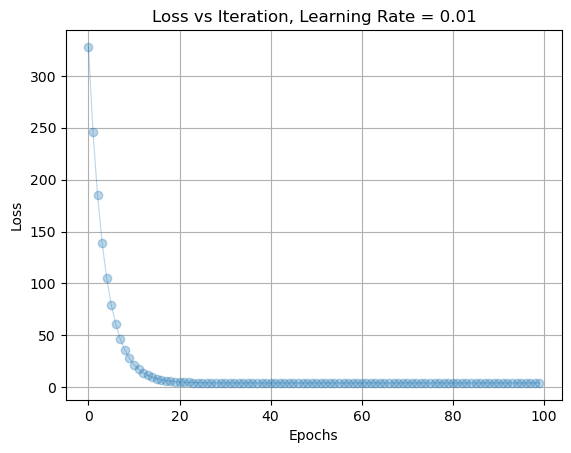

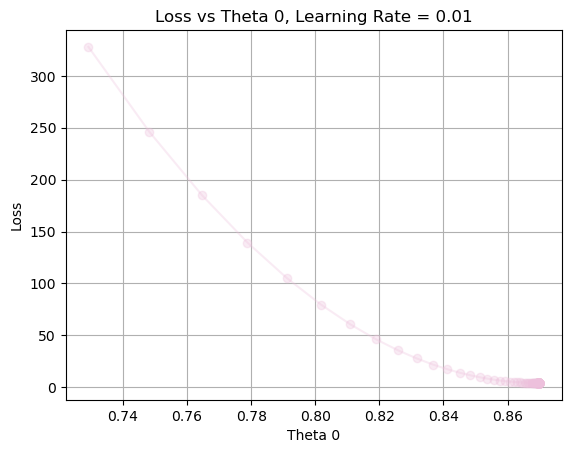

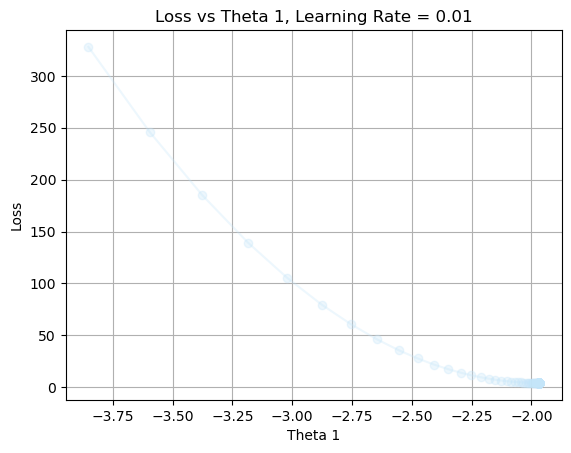

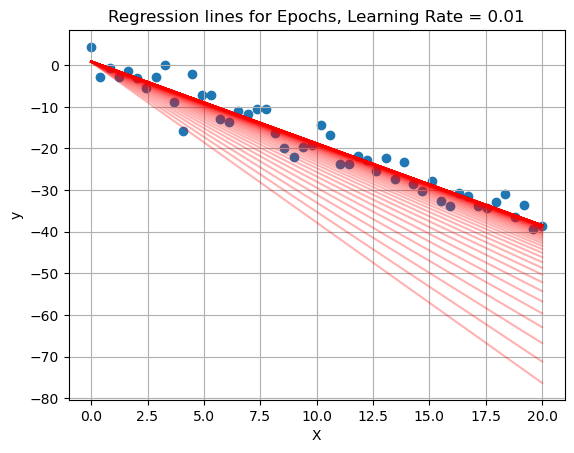

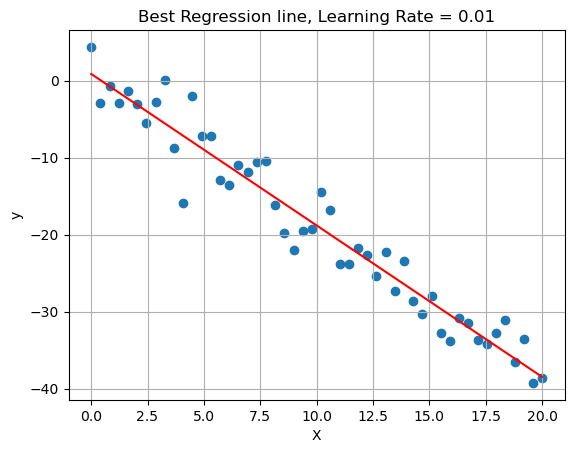

In [970]:
all_thetas, loss, y_preds, theta, y_pred= GD(X,y)
all_plots(loss, all_thetas, y_pred, lr=0.01)

### **Controller is cost check**

In [976]:
# Controller is cost check
def GD(data, labels, learning_rate=0.001, epochs=1000000, grad_check=0.001, cost_check=0.001, verbose=False):
    loss = [np.inf]
    all_thetas = []
    y_preds = []
    data_with_itercept = np.column_stack((np.ones_like(labels), data))
    theta = np.random.normal(size=data_with_itercept.shape[1], loc=0, scale=5).reshape((data_with_itercept.shape[1], 1))
    print(f"Initial theta =\n{theta}")
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        h = data_with_itercept @ theta
        y_preds.append(h)
        Err_vec = h - labels
        J = np.linalg.norm(Err_vec, ord=2)**2 / (2 * len(labels))
        loss.append(J)
        grad = (1 / len(labels)) * (data_with_itercept.T @ Err_vec)
        if np.linalg.norm(grad) < grad_check:
            print(f"End at Epoch Number : {i}")
            break
        if abs(loss[-1] - loss[-2]) < cost_check:
            print(f"End at Epoch Number : {i}")
            break
        theta = theta - learning_rate * grad
        all_thetas.append(theta)
        
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")
    all_thetas = np.array(all_thetas)
    loss = np.array(loss[1:-1])
    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    
    y_pred = data_with_itercept @ theta
    if verbose:
        print(f"y predict = {y_pred}")

    return all_thetas, loss, y_preds, theta, y_pred

Initial theta =
[[0.86562648]
 [4.85469536]]
End at Epoch Number : 48

Final Parameters:
theta :
[[ 0.3679519 ]
 [-1.92295419]]
final cost : 4.113894604320024


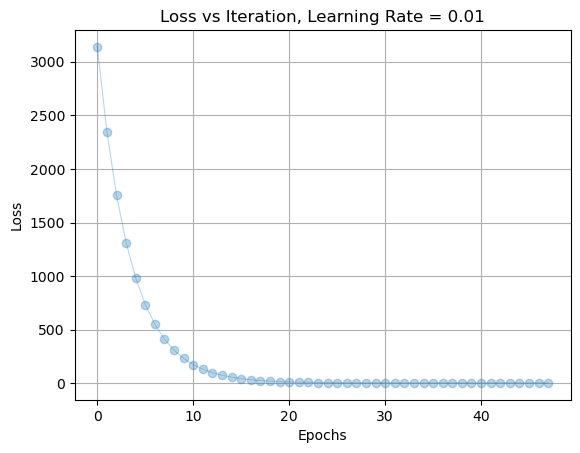

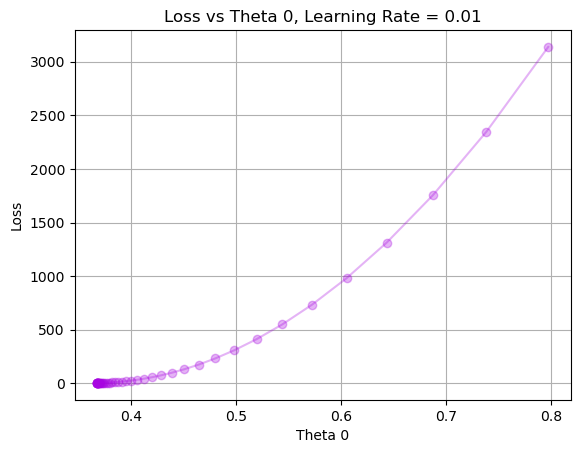

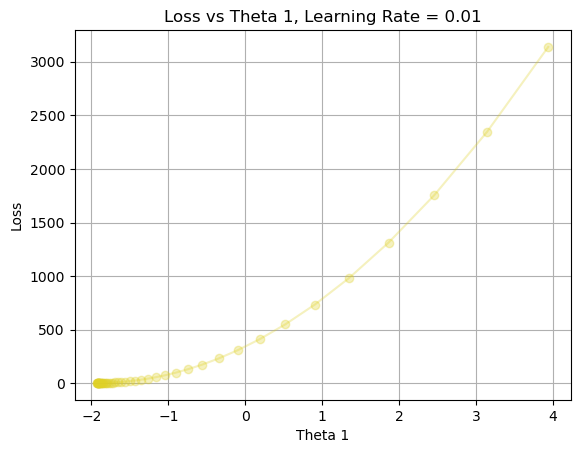

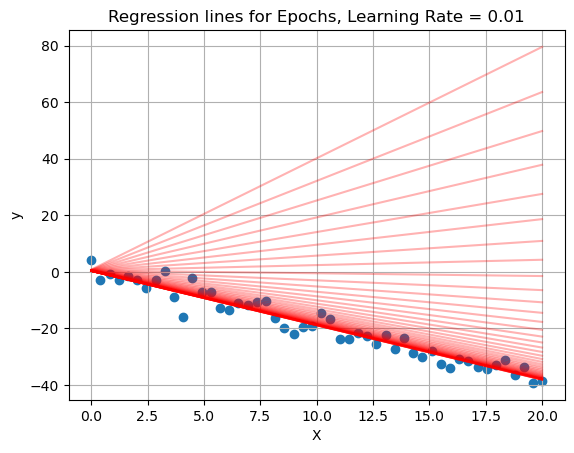

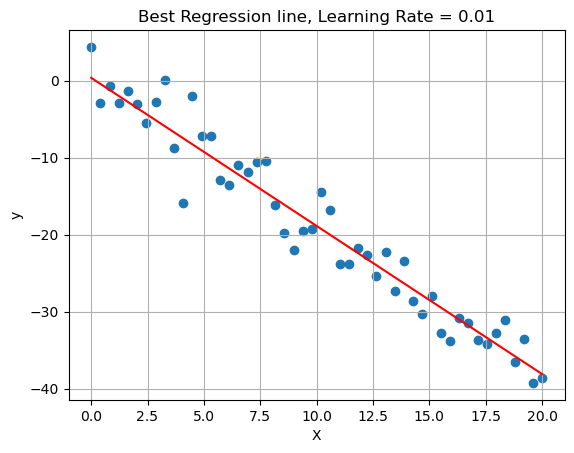

In [978]:
all_thetas, loss, y_preds, theta, y_pred= GD(X,y)
all_plots(loss, all_thetas, y_pred, lr=0.01)

## [2] Stochastic GD :

In [979]:
def SGD(data, labels, learning_rate=0.001, epochs=1000000, grad_check=0.001, cost_check=0.001, verbose=False):
    loss = [np.inf]
    all_thetas = []
    y_preds = []
    data_with_intercept_original = np.column_stack((np.ones_like(labels), data))
    theta = np.random.normal(size=data_with_intercept_original.shape[1]).reshape((data_with_intercept_original.shape[1], 1))
    data_and_labels = np.column_stack((data_with_intercept_original, labels))
    m = len(labels)
    
    print(f"Initial theta =\n{theta}")
    
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        np.random.shuffle(data_and_labels)
        data_with_intercept = data_and_labels[:, :-1]
        labels = data_and_labels[:, -1].reshape((-1, 1))
        for j in range(m):
            h = data_with_intercept[j] @ theta
            y_preds.append(h)
            Err_vec = h - labels[j]
            J = np.linalg.norm(Err_vec)**2 / 2
            loss.append(J)
            grad = data_with_intercept[j].reshape(-1, 1) * Err_vec 
            theta = theta - learning_rate * grad
            all_thetas.append(theta)
            
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")

        if np.linalg.norm(grad) < grad_check:
            print(f"End at Epoch Number : {i}")
            break
        if abs(loss[-1] - loss[-(m+1)]) < cost_check:
            print(f"End at Epoch Number : {i}")
            break

    all_thetas = np.array(all_thetas)
    loss = np.array(loss[1:])
    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    
    y_pred = data_with_intercept_original @ theta
    
    if verbose:
        print(f"y predict = {y_pred}")
        
    return all_thetas, loss, y_preds, theta, y_pred


Initial theta =
[[2.05196813]
 [2.98157141]]
End at Epoch Number : 279

Final Parameters:
theta :
[[ 0.90055848]
 [-1.91153244]]
final cost : 2.7479599602315398e-09


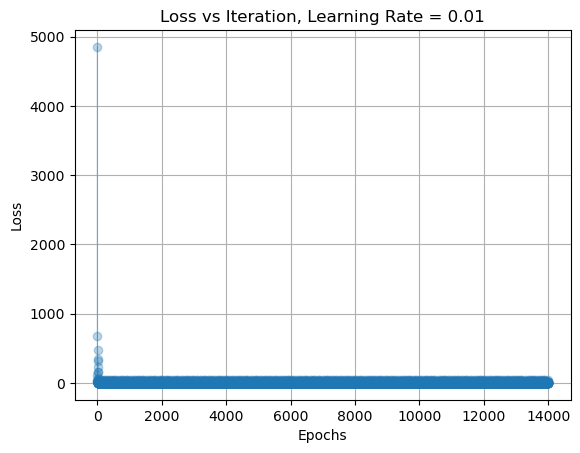

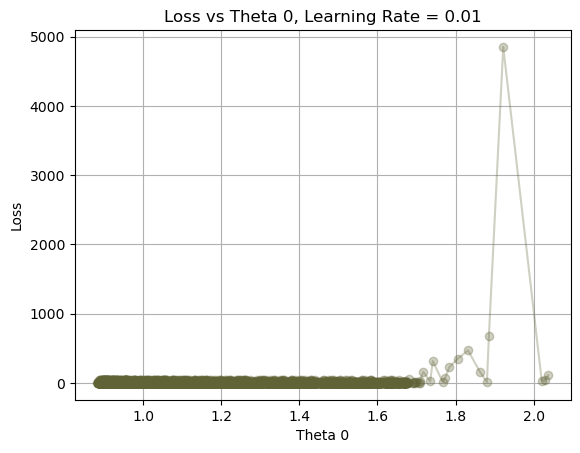

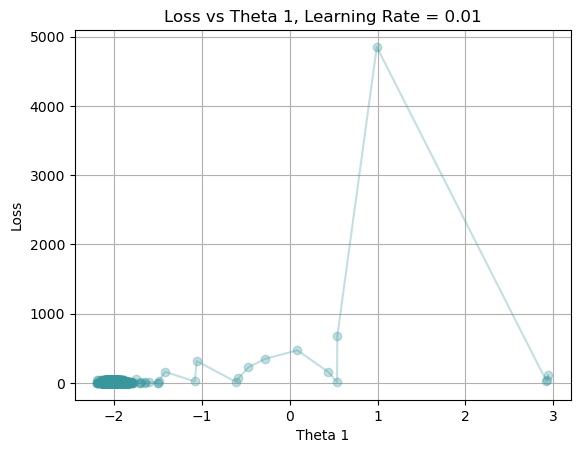

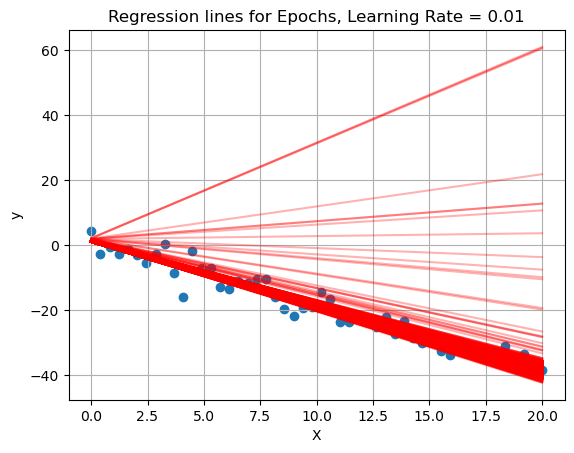

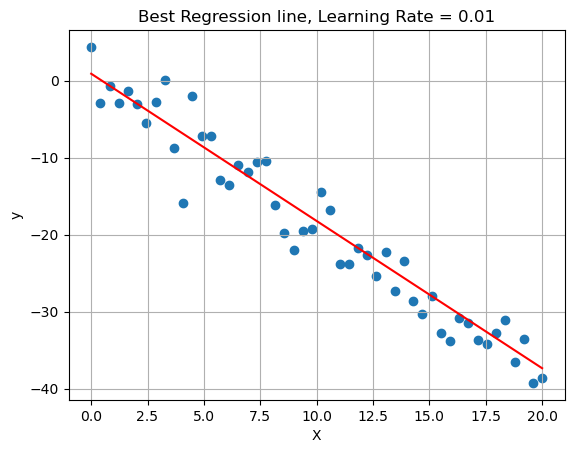

In [980]:
all_thetas, loss, y_preds, theta, y_pred = SGD(X, y)
all_plots(loss, all_thetas, y_pred, lr=0.01)

## [3] MiniBatch GD :

In [981]:
def MiniBatch(data, labels, batch_size=20, learning_rate=0.001, epochs=1000000, grad_check=0.001, cost_check=0.001, verbose=False):
    loss = [np.inf]
    all_thetas = []
    y_preds = []
    data_with_intercept_original = np.column_stack((np.ones_like(labels), data))
    theta = np.random.normal(size=data_with_intercept_original.shape[1]).reshape((data_with_intercept_original.shape[1], 1))
    data_and_labels = np.column_stack((data_with_intercept_original, labels))
    number_of_batches = int(np.ceil(len(labels) / batch_size))

    print(f"Initial theta =\n{theta}")
    
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        np.random.shuffle(data_and_labels)
        data_with_intercept = data_and_labels[:, :-1]
        labels = data_and_labels[:, -1].reshape((-1, 1))
        
        for j in range(number_of_batches):
            start_index = j * batch_size 
            end_index = min(start_index + batch_size, len(labels))
            h = data_with_intercept[start_index : end_index] @ theta
            y_preds.append(h)
            Err_vec = h - labels[start_index : end_index]
            m = len(Err_vec)
            J = np.linalg.norm(Err_vec)**2 / (2 * m)
            loss.append(J)
            grad = (1 / m) * (data_with_intercept[start_index : end_index].T @ Err_vec)
            theta = theta - learning_rate * grad
            all_thetas.append(theta)
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")

        if np.linalg.norm(grad) < grad_check:
            print(f"\nEnd at Epoch Number : {i}")
            break
        if abs(loss[-1] - loss[-(number_of_batches+1)]) < cost_check:
            print(f"\nEnd at Epoch Number : {i}")
            break

        
    all_thetas = np.array(all_thetas)
    loss = np.array(loss[1:])
    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    
    y_pred = data_with_intercept_original @ theta
        
    if verbose:
        print(f"y predict = {y_pred}")
    
    return all_thetas, loss, y_preds, theta, y_pred


Initial theta =
[[-0.78457361]
 [ 1.13749533]]

End at Epoch Number : 435

Final Parameters:
theta :
[[ 0.82081942]
 [-2.01528026]]
final cost : 1.7336419843602993


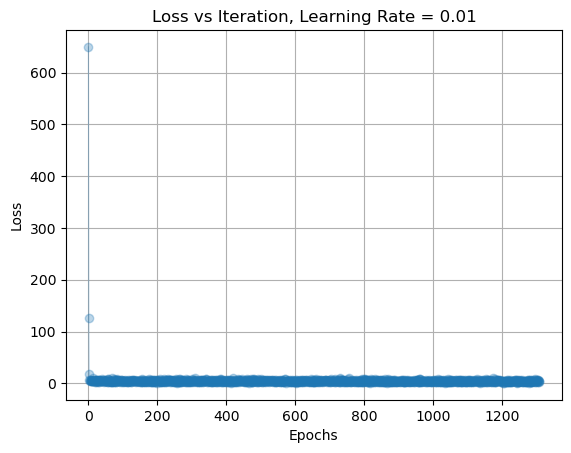

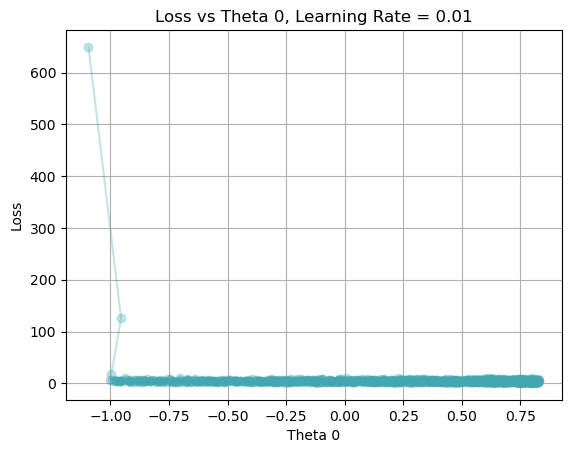

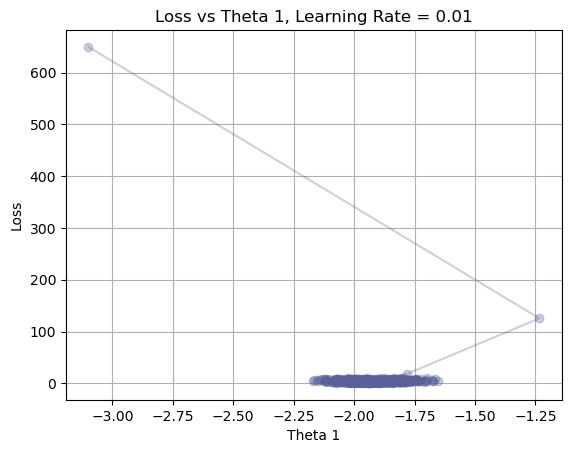

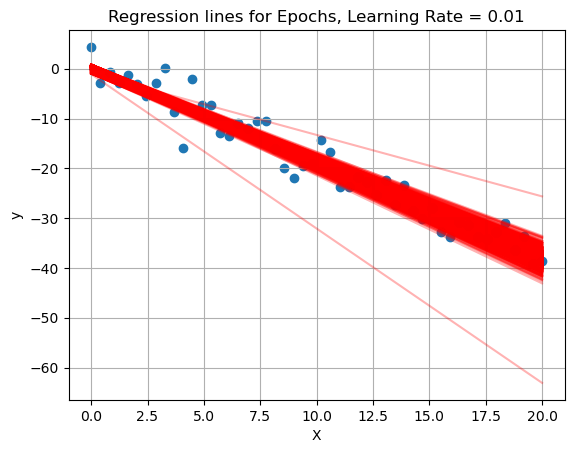

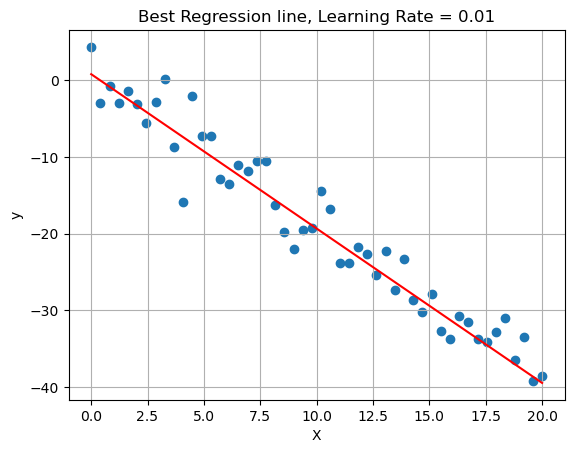

In [988]:
all_thetas, loss, y_preds, theta, y_pred = MiniBatch(X,y, learning_rate=0.01)
all_plots(loss, all_thetas, y_pred, lr=0.01)

## [4] Momentum GD :

In [989]:
def MomentumGD(data, labels, gamma=0.5,  batch_size=20, learning_rate=0.001, epochs=1000000, grad_check=0.001, cost_check=0.001, verbose=False):
    loss = [np.inf]
    all_thetas = []
    y_preds = []
    data_with_intercept_original = np.column_stack((np.ones_like(labels), data))
    theta = np.random.normal(size=data_with_intercept_original.shape[1]).reshape((data_with_intercept_original.shape[1], 1))
    v = np.zeros_like(theta)
    data_and_labels = np.column_stack((data_with_intercept_original, labels))
    number_of_batches = int(np.ceil(len(labels) / batch_size))

    print(f"Initial theta =\n{theta}")
    
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        np.random.shuffle(data_and_labels)
        data_with_intercept = data_and_labels[:, :-1]
        labels = data_and_labels[:, -1].reshape((-1, 1))
        
        for j in range(number_of_batches):
            start_index = j * batch_size 
            end_index = min(start_index + batch_size, len(labels))
            h = data_with_intercept[start_index : end_index] @ theta
            y_preds.append(h)
            Err_vec = h - labels[start_index : end_index]
            m = len(Err_vec)
            J = np.linalg.norm(Err_vec)**2 / (2 * m)
            loss.append(J)
            grad = (1 / m) * (data_with_intercept[start_index : end_index].T @ Err_vec)
            v = gamma * v + learning_rate * grad
            theta = theta - v
            all_thetas.append(theta)
            
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")

        if np.linalg.norm(grad) < grad_check:
            print(f"\nEnd at Epoch Number : {i}")
            break
        if abs(loss[-1] - loss[-(number_of_batches+1)]) < cost_check:
            print(f"\nEnd at Epoch Number : {i}")
            break

        
    all_thetas = np.array(all_thetas)
    loss = np.array(loss[1:])
    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    
    y_pred = data_with_intercept_original @ theta
        
    if verbose:
        print(f"y predict = {y_pred}")
    
    return all_thetas, loss, y_preds, theta, y_pred


Initial theta =
[[-0.22102338]
 [-0.70565085]]

End at Epoch Number : 33

Final Parameters:
theta :
[[-0.29650685]
 [-1.87566748]]
final cost : 4.258813481934716


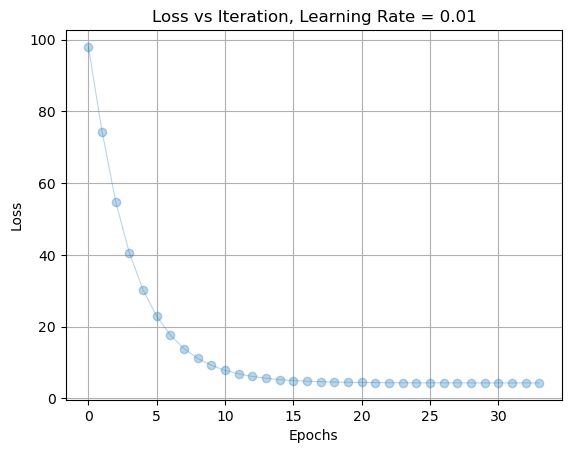

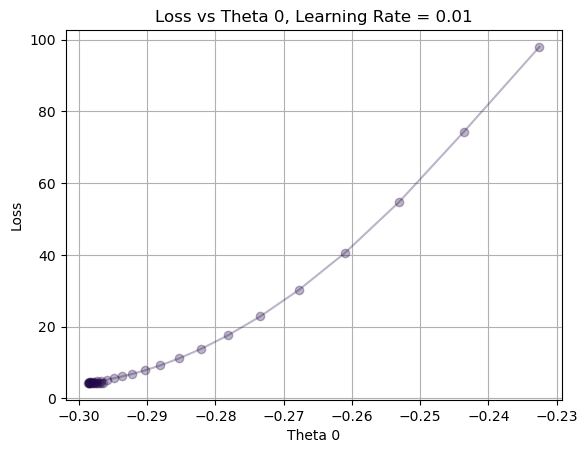

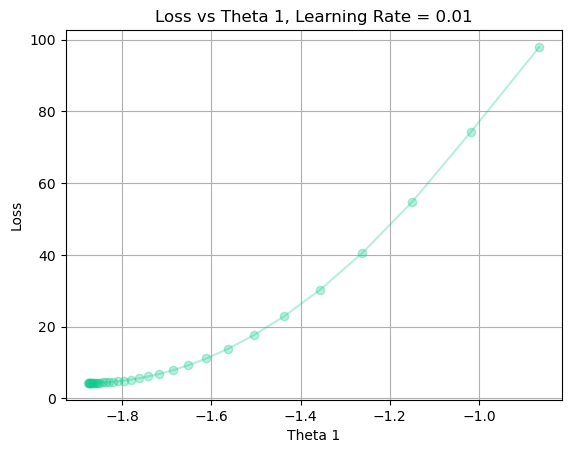

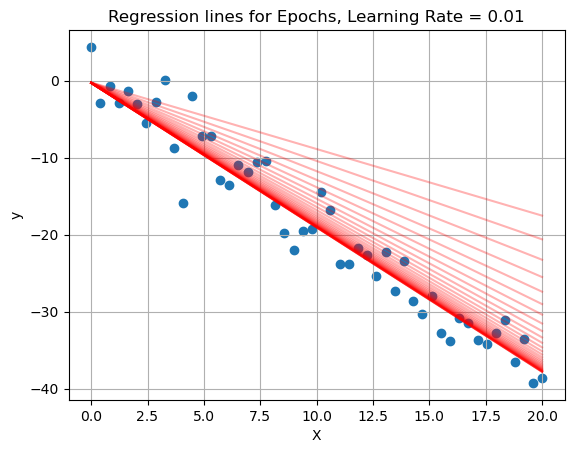

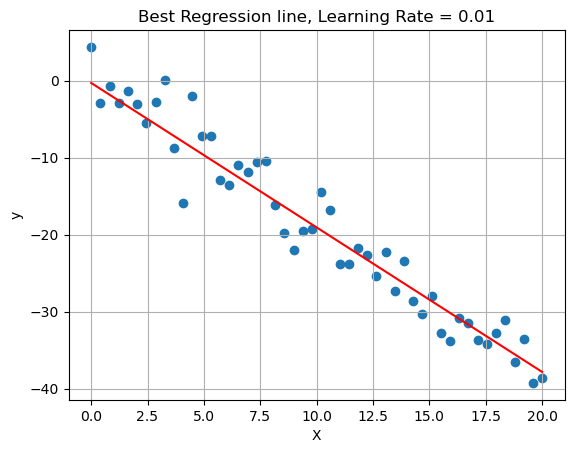

In [990]:
all_thetas, loss, y_preds, theta, y_pred = MomentumGD(X,y,batch_size=50, gamma=0.1)
all_plots(loss, all_thetas, y_pred, lr=0.01)

## [5] NAG :

In [1000]:
def NAG(data, labels, gamma=0.5,  batch_size=20, learning_rate=0.001, epochs=1000000, grad_check=0.001, cost_check=0.001, verbose=False):
    loss = [np.inf]
    all_thetas = []
    y_preds = []
    
    data_with_intercept_original = np.column_stack((np.ones_like(labels), data))
    
    theta = np.random.normal(size=data_with_intercept_original.shape[1]).reshape((data_with_intercept_original.shape[1], 1))
    v = np.zeros_like(theta)
    theta_temp = np.zeros_like(theta)
    
    data_and_labels = np.column_stack((data_with_intercept_original, labels))
    number_of_batches = int(np.ceil(len(labels) / batch_size))

    print(f"Initial theta =\n{theta}")
    
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        np.random.shuffle(data_and_labels)
        data_with_intercept = data_and_labels[:, :-1]
        labels = data_and_labels[:, -1].reshape((-1, 1))
        
        for j in range(number_of_batches):
            
            theta_temp = theta - gamma * v
    
            start_index = j * batch_size 
            end_index = min(start_index + batch_size, len(labels))
            h = data_with_intercept[start_index : end_index] @ theta_temp
            y_preds.append(h)
            Err_vec = h - labels[start_index : end_index]
            m = len(Err_vec)
            J = np.linalg.norm(Err_vec)**2 / (2 * m)
            loss.append(J)
            
            grad = (1 / m) * (data_with_intercept[start_index : end_index].T @ Err_vec)
            
            theta = theta_temp - learning_rate * grad
            all_thetas.append(theta)
            
            v = gamma * v + learning_rate * grad
            

            
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")

        if np.linalg.norm(grad) < grad_check:
            print(f"\nEnd at Epoch Number : {i}")
            break
        if abs(loss[-1] - loss[-(number_of_batches+1)]) < cost_check:
            print(f"\nEnd at Epoch Number : {i}")
            break
        
    all_thetas = np.array(all_thetas)
    loss = np.array(loss[1:])
    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    
    y_pred = data_with_intercept_original @ theta
        
    if verbose:
        print(f"y predict = {y_pred}")
    
    return all_thetas, loss, y_preds, theta, y_pred


Initial theta =
[[2.28584954]
 [0.1293041 ]]

End at Epoch Number : 70

Final Parameters:
theta :
[[ 0.46802332]
 [-1.92232315]]
final cost : 2.9799659841873245


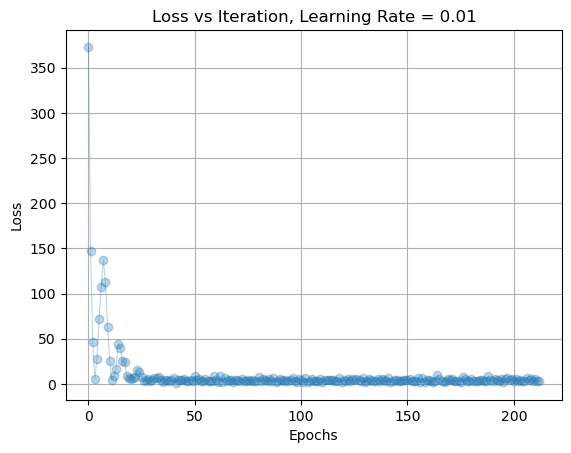

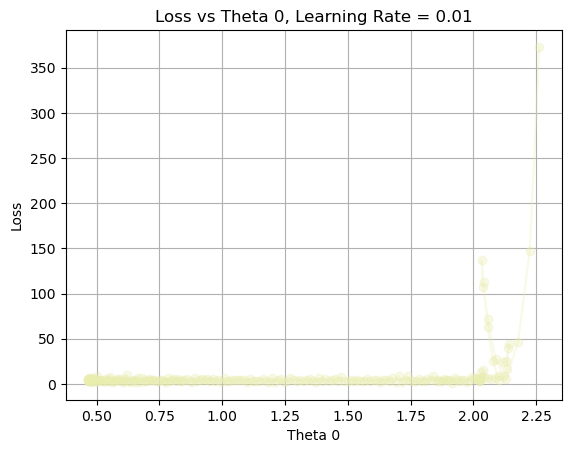

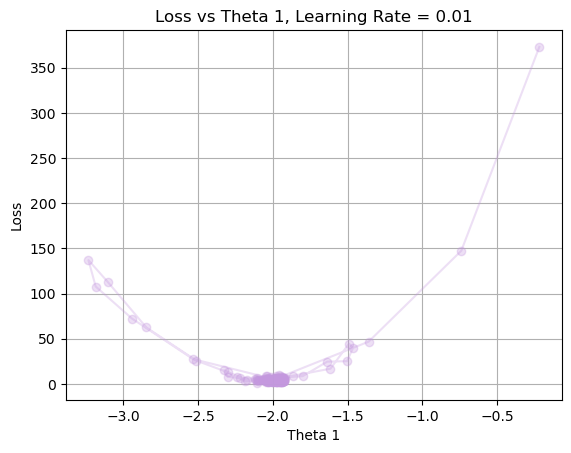

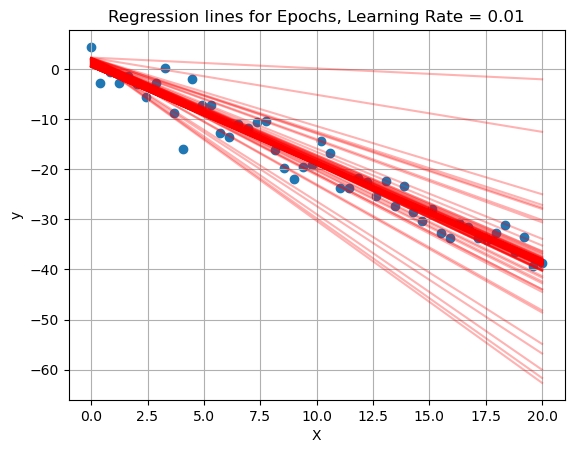

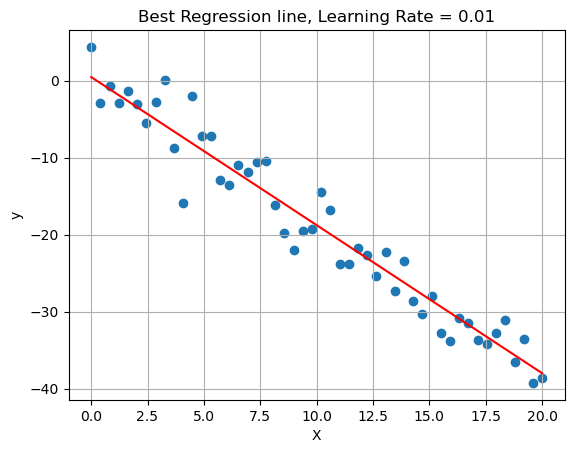

In [1001]:
all_thetas, loss, y_preds, theta, y_pred = NAG(X,y,batch_size=20, gamma=0.99)
all_plots(loss, all_thetas, y_pred, lr=0.01)

## [6] AdaGrad :

In [1004]:
def AdaGrad(data, labels, batch_size=20, learning_rate=0.001, epslon=1e-8, epochs=1000000, grad_check=0.001, cost_check=0.001, verbose=False):
    loss = [np.inf]
    all_thetas = []
    y_preds = []
    
    data_with_intercept_original = np.column_stack((np.ones_like(labels), data))
    
    theta = np.random.normal(size=data_with_intercept_original.shape[1]).reshape((data_with_intercept_original.shape[1], 1))
    v = np.zeros_like(theta)
    
    data_and_labels = np.column_stack((data_with_intercept_original, labels))
    number_of_batches = int(np.ceil(len(labels) / batch_size))

    print(f"Initial theta =\n{theta}")
    
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        np.random.shuffle(data_and_labels)
        data_with_intercept = data_and_labels[:, :-1]
        labels = data_and_labels[:, -1].reshape((-1, 1))
        
        for j in range(number_of_batches):
                
            start_index = j * batch_size 
            end_index = min(start_index + batch_size, len(labels))
            h = data_with_intercept[start_index : end_index] @ theta
            y_preds.append(h)
            Err_vec = h - labels[start_index : end_index]
            m = len(Err_vec)
            J = np.linalg.norm(Err_vec)**2 / (2 * m)
            loss.append(J)
            grad = (1 / m) * (data_with_intercept[start_index : end_index].T @ Err_vec)
            
            v = v + grad**2
            
            theta = theta - (learning_rate/(np.sqrt(v) + epslon)) * grad
            all_thetas.append(theta)
            

            
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")

        if np.linalg.norm(grad) < grad_check:
            print(f"\nEnd at Epoch Number : {i}")
            break
        if abs(loss[-1] - loss[-(number_of_batches+1)]) < cost_check:
            print(f"\nEnd at Epoch Number : {i}")
            break


    all_thetas = np.array(all_thetas)
    loss = np.array(loss[1:])
    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    
    y_pred = data_with_intercept_original @ theta
        
    if verbose:
        print(f"y predict = {y_pred}")
    
    return all_thetas, loss, y_preds, theta, y_pred


Initial theta =
[[-1.09878062]
 [-0.650852  ]]

End at Epoch Number : 120

Final Parameters:
theta :
[[ 0.94094944]
 [-1.91186808]]
final cost : 2.0657676324285625


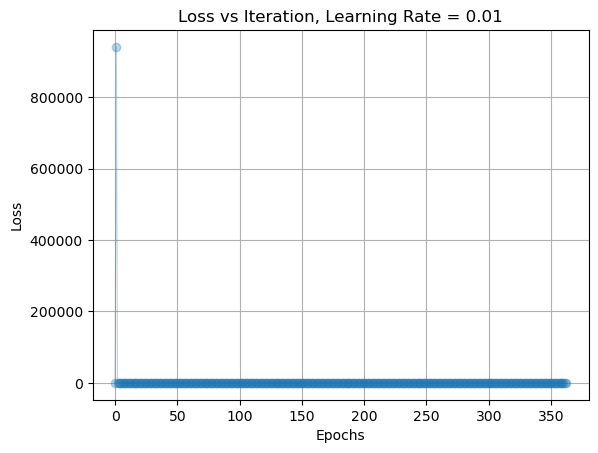

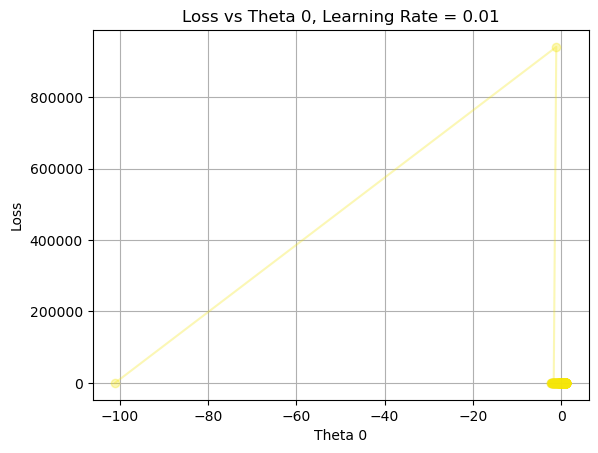

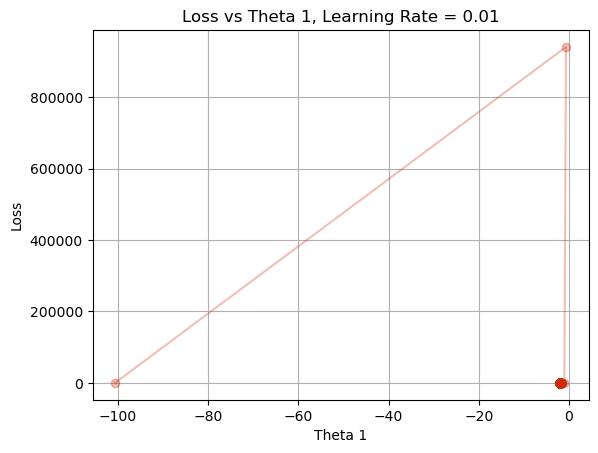

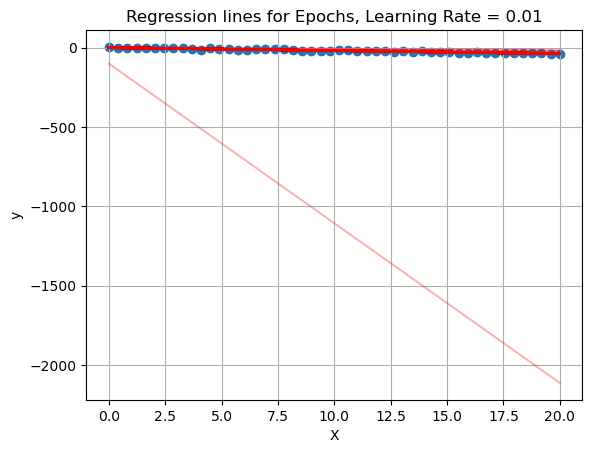

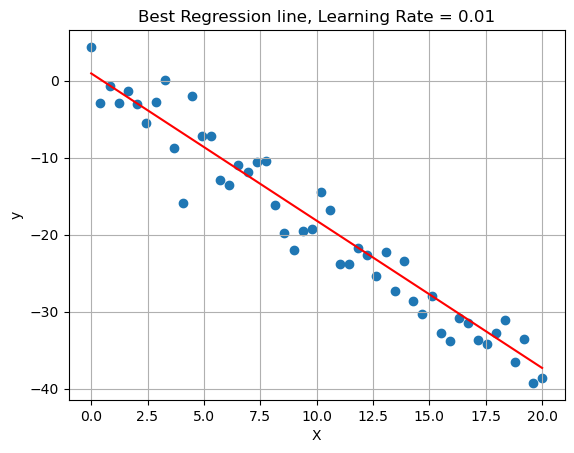

In [1012]:
all_thetas, loss, y_preds, theta, y_pred = AdaGrad(X, y, learning_rate=100)
all_plots(loss, all_thetas, y_pred, lr=0.01)

## [7] RMSProp :

In [1013]:
def RMSProp(data, labels, batch_size=20, beta=0.9, learning_rate=0.001, epslon=1e-8, epochs=1000000, grad_check=0.001, cost_check=0.001, verbose=False):
    loss = [np.inf]
    all_thetas = []
    y_preds = []
    
    data_with_intercept_original = np.column_stack((np.ones_like(labels), data))
    
    theta = np.random.normal(size=data_with_intercept_original.shape[1]).reshape((data_with_intercept_original.shape[1], 1))
    v = np.zeros_like(theta)
    
    data_and_labels = np.column_stack((data_with_intercept_original, labels))
    number_of_batches = int(np.ceil(len(labels) / batch_size))

    print(f"Initial theta =\n{theta}")
    
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        np.random.shuffle(data_and_labels)
        data_with_intercept = data_and_labels[:, :-1]
        labels = data_and_labels[:, -1].reshape((-1, 1))
        
        for j in range(number_of_batches):
                
            start_index = j * batch_size 
            end_index = min(start_index + batch_size, len(labels))
            h = data_with_intercept[start_index : end_index] @ theta
            y_preds.append(h)
            Err_vec = h - labels[start_index : end_index]
            m = len(Err_vec)
            J = np.linalg.norm(Err_vec)**2 / (2 * m)
            loss.append(J)
            grad = (1 / m) * (data_with_intercept[start_index : end_index].T @ Err_vec)
            
            v = beta * v + (1 - beta) * (grad)**2
            
            theta = theta - learning_rate * (grad / (np.sqrt(v) + epslon))
            all_thetas.append(theta)
            

            
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")

        if np.linalg.norm(grad) < grad_check:
            print(f"\nEnd at Epoch Number : {i}")
            break
        if abs(loss[-1] - loss[-(number_of_batches+1)]) < cost_check:
            print(f"\nEnd at Epoch Number : {i}")
            break

        
    all_thetas = np.array(all_thetas)
    loss = np.array(loss[1:])
    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    
    y_pred = data_with_intercept_original @ theta
        
    if verbose:
        print(f"y predict = {y_pred}")
    
    return all_thetas, loss, y_preds, theta, y_pred


Initial theta =
[[ 1.14714606]
 [-0.40994614]]

End at Epoch Number : 1171

Final Parameters:
theta :
[[ 0.8667085 ]
 [-1.96383715]]
final cost : 3.379491938927989


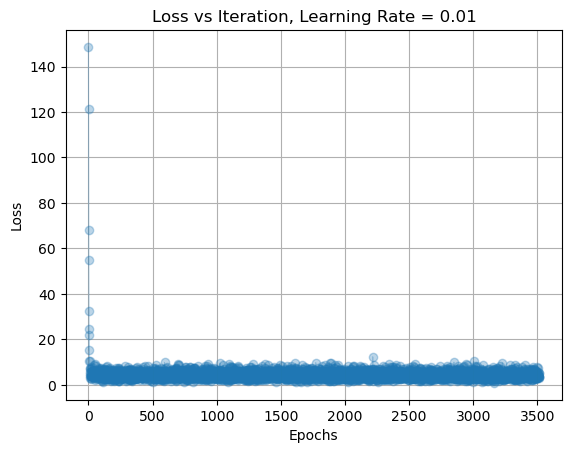

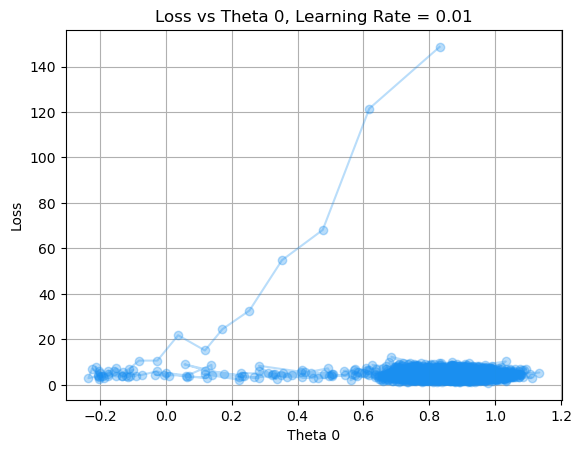

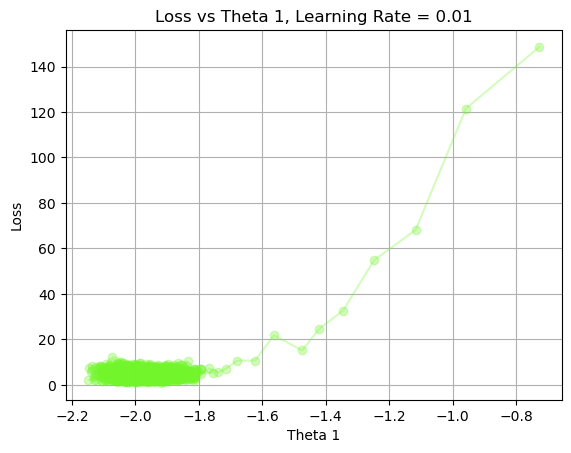

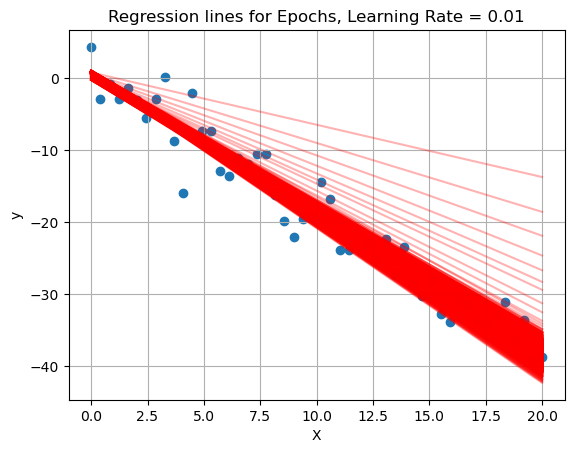

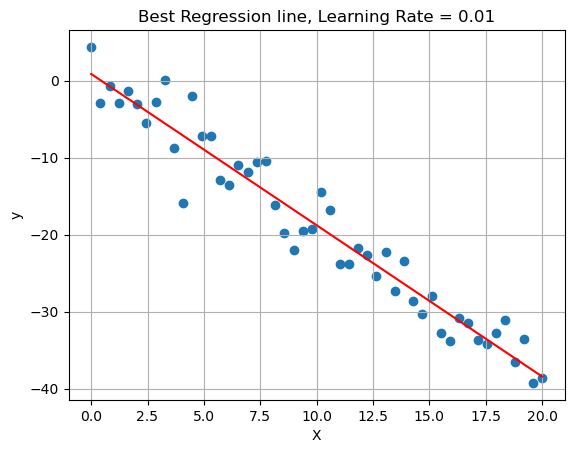

In [1017]:
all_thetas, loss, y_preds, theta, y_pred = RMSProp(X, y, learning_rate=0.1)
all_plots(loss, all_thetas, y_pred, lr=0.01)


## [8] Adam :

In [1018]:
def Adam(data, labels, batch_size=20, beta1=0.9, beta2=0.9, learning_rate=0.001, epslon=1e-8, epochs=1000000, grad_check=0.001, cost_check=0.001, verbose=False):
    loss = [np.inf]
    all_thetas = []
    y_preds = []
    
    data_with_intercept_original = np.column_stack((np.ones_like(labels), data))
    
    theta = np.random.normal(size=data_with_intercept_original.shape[1]).reshape((data_with_intercept_original.shape[1], 1))
    v = np.zeros_like(theta)
    mu = np.zeros_like(theta)
    
    data_and_labels = np.column_stack((data_with_intercept_original, labels))
    number_of_batches = int(np.ceil(len(labels) / batch_size))

    print(f"Initial theta =\n{theta}")
    
    for i in range(epochs):
        if verbose:
            print('*' * 20 + f' Epoch {i} ' + '*' * 20)
            
        np.random.shuffle(data_and_labels)
        data_with_intercept = data_and_labels[:, :-1]
        labels = data_and_labels[:, -1].reshape((-1, 1))
        
        for j in range(number_of_batches):
                
            start_index = j * batch_size 
            end_index = min(start_index + batch_size, len(labels))
            h = data_with_intercept[start_index : end_index] @ theta
            y_preds.append(h)
            Err_vec = h - labels[start_index : end_index]
            m = len(Err_vec)
            J = np.linalg.norm(Err_vec)**2 / (2 * m)
            loss.append(J)
            grad = (1 / m) * (data_with_intercept[start_index : end_index].T @ Err_vec)
            
            mu = beta1 * mu + (1 - beta1) * grad
            
            v = beta2 * v + (1 - beta2) * (grad)**2

            theta = theta - (learning_rate / (np.sqrt(v) + epslon)) * mu
            all_thetas.append(theta)

            
        if verbose:
            print("Cost (J) =", J)
            print(f"Gradient :\n{grad}")
            print(f"theta :\n{theta}")

        if np.linalg.norm(grad) < grad_check:
            print(f"\nEnd at Epoch Number : {i}")
            break
        if abs(loss[-1] - loss[-(number_of_batches+1)]) < cost_check:
            print(f"\nEnd at Epoch Number : {i}")
            break
        
    all_thetas = np.array(all_thetas)
    loss = np.array(loss[1:])
    print("\nFinal Parameters:")
    print(f"theta :\n{theta}")
    print(f"final cost : {J}")
    
    y_pred = data_with_intercept_original @ theta
        
    if verbose:
        print(f"y predict = {y_pred}")
    
    return all_thetas, loss, y_preds, theta, y_pred


Initial theta =
[[ 1.255926  ]
 [-0.42415228]]

End at Epoch Number : 171

Final Parameters:
theta :
[[ 0.8705687 ]
 [-1.98898072]]
final cost : 3.0596795543889628


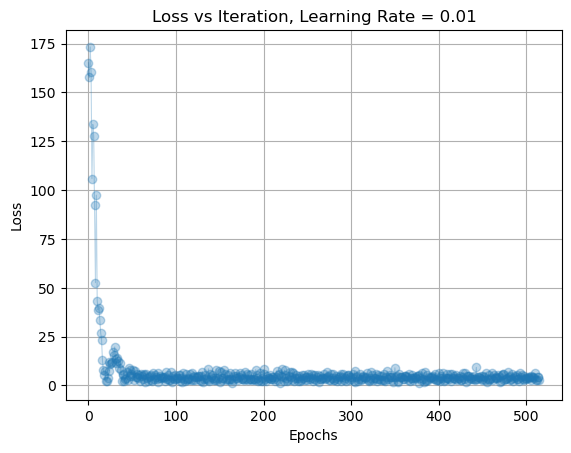

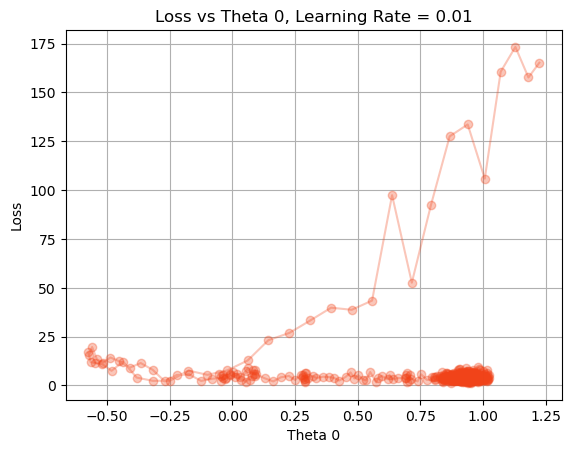

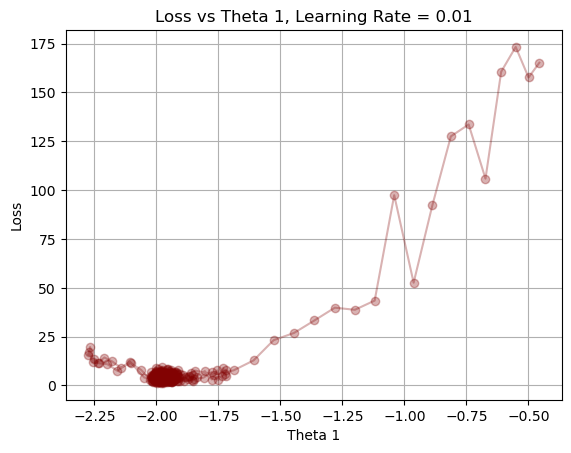

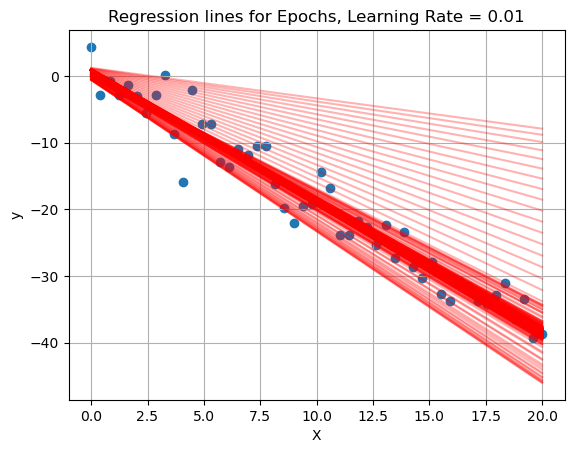

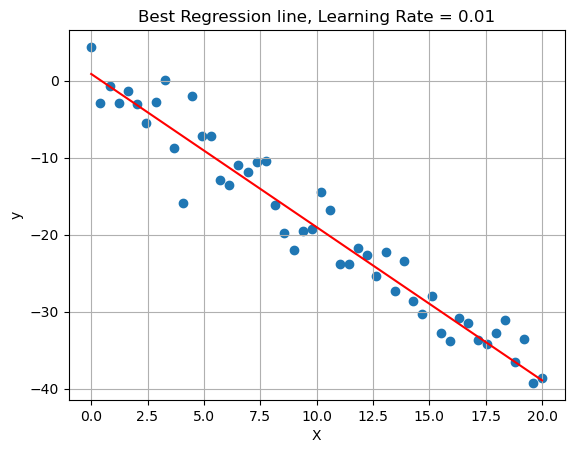

In [1020]:
all_thetas, loss, y_preds, theta, y_pred = Adam(X, y, learning_rate=0.1)
all_plots(loss, all_thetas, y_pred, lr=0.01)

## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

# 𝚫𝒙_𝒌  = 𝒙_𝒌−𝒙_(𝒌−𝟏)     and    𝒚_𝒌  = 𝛁 𝒇(𝒙_𝒌) −𝛁𝒇(𝒙_(𝒌−𝟏)) 

In [891]:
def my_func1(x):
    return x[0]**2 + x[1]**2

def grad_my_func1(x):
    grad = np.array([2*x[0], 2*x[1]]).reshape((-1, 1))
    return grad


def my_func2(x):
    return x[0]**2 + x[0]*x[1] + x[1]**2

def grad_my_func2(x):
    grad = np.array([2*x[0] + x[1], 2*x[1] + x[0]]).reshape((-1, 1))
    return grad

def my_func3(x):
    return x[0]**2 * x[1]

def grad_my_func3(x):
    grad = np.array([2*x[0] * x[1], x[0]**2]).reshape((-1, 1))
    return grad

def BFGS(grad_func, x_n, x_n1, grad_check, alpha=1, max_iter=1000, epsilon=1e-5):
    I = np.identity(len(x_n))
    dx = (x_n1 - x_n)
    B_inv = np.linalg.inv(I)
    my_grad = grad_func(x_n)
    y = (grad_func(x_n1) - grad_func(x_n))
    
    for i in range(max_iter):
        if np.linalg.norm(my_grad) < grad_check:
            break
        print('*' * 30 + f" Iter {i+1} " + '*' * 30)
        print(f"x_n1 :\n{x_n1}")
        print(f"x_n :\n{x_n}")
        print(f"df(x_n1) :\n{grad_func(x_n1)}")
        print(f"df(x_n) :\n{grad_func(x_n)}")
        print(f"Gradient Norm : {np.linalg.norm(my_grad)}")
        print(f"B_inv : \n{B_inv}")
        rho = 1.0 / np.dot(y.T, dx)
        
        A1 = I - rho * np.dot(dx, y.T)
        A2 = I - rho * np.dot(y, dx.T)
        
        B_inv = A1 @ B_inv @ A2 + rho * np.dot(dx, dx.T)
        x_n = x_n1
        x_n1 = x_n1 - alpha * B_inv @ grad_func(x_n1)
        
        dx = (x_n1 - x_n)
        my_grad = grad_func(x_n)
        y = (grad_func(x_n1) - my_grad)
        
    print(f"x_y_min : \n{x_n1}")
    print(f"Gradient min : \n{grad_func(x_n1)}")    
    return x_n1.reshape((-1, 1))


In [892]:
BFGS(grad_my_func1, np.array([[10],[10]]), np.array([[9],[9]]), 0.001, alpha=1, max_iter=1000, epsilon=1e-3)

****************************** Iter 1 ******************************
x_n1 :
[[9]
 [9]]
x_n :
[[10]
 [10]]
df(x_n1) :
[[18]
 [18]]
df(x_n) :
[[20]
 [20]]
Gradient Norm : 28.284271247461902
B_inv : 
[[1. 0.]
 [0. 1.]]
****************************** Iter 2 ******************************
x_n1 :
[[0.]
 [0.]]
x_n :
[[9]
 [9]]
df(x_n1) :
[[0.]
 [0.]]
df(x_n) :
[[18]
 [18]]
Gradient Norm : 25.45584412271571
B_inv : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
x_y_min : 
[[0.]
 [0.]]
Gradient min : 
[[0.]
 [0.]]


array([[0.],
       [0.]])